# Using Python for Research Homework: Week 2

In this homework, we will use the tools we've covered in the past two weeks to create a tic-tac-toe (noughts and crosses) simulator and evaluate basic winning strategies.

### Exercise 1

Tic-tac-toe (or noughts and crosses) is a simple strategy game in which two players take turns placing a mark on a 3x3 board, attempting to make a row, column, or diagonal of three with their mark. In this homework, we will use the tools we've covered in the past two weeks to create a tic-tac-toe simulator and evaluate basic winning strategies.

In the following exercises, we will learn to create a tic-tac-toe board, place markers on the board, evaluate if either player has won, and use this to simulate two basic strategies.

#### Instructions 

- For our tic-tac-toe board, we will use a numpy array with dimension 3 by 3. 
- Make a function `create_board()` that creates such a board with the value of each cell set to the integer `0`.
- Call `create_board()` and store it.

In [1]:
# write your code here!
import numpy as np

def create_board():
  return np.zeros((3,3))

board= create_board()
board


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### Exercise 2

Players 1 and 2 will take turns changing values of this array from a 0 to a 1 or 2, indicating the number of the player who places a marker there.

#### Instructions 

- Create a function `place(board, player, position)`, where:
    - `player` is the current player (an integer 1 or 2).
    - `position` is a tuple of length 2 specifying a desired location to place their marker.
    - Your function should only allow the current player to place a marker on the board (change the board position to their number) if that position is empty (zero).
- Use `create_board()` to store a board as `board`, and use `place` to have Player 1 place a marker on location `(0, 0)`.

In [2]:
# write your code here!
def place(board, player, position):
  board[position]=player
  return board

board=place(board,1,(0,0))
print(board)
#empy=np.where(board==0)
#empy

[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
#board=place(board,1,[0,2]) 
#print(board)

### Exercise 3

In this exercise, we will determine which positions are available to either player for placing their marker.

#### Instructions 
- Create a function `possibilities(board)` that returns a list of all positions (tuples) on the board that are not occupied (0). (Hint: `numpy.where` is a handy function that returns a list of indices that meet a condition.)
- `board` is already defined from previous exercises. Call `possibilities(board)` to see what it returns!

In [3]:
# write your code here!
def possibilities(board):
  empy=np.where(board==0) #retorna las cordenadas en donde el array cumple la condicion, pero las cordenadas las devuelve en dos array por separado
  cordenate= np.array([list(empy[0]),list(empy[1])]) #para agregar simplemente convierte los elementos del array en listas
  return np.transpose(cordenate) # reordena el array de manera transpuesta

list(possibilities(board))

[array([0, 1]),
 array([0, 2]),
 array([1, 0]),
 array([1, 1]),
 array([1, 2]),
 array([2, 0]),
 array([2, 1]),
 array([2, 2])]

### Exercise 4

The next step is for the current player to place a marker among the available positions. In this exercise, we will select an available board position at random and place a marker there.

#### Instructions 

- Write a function `random_place(board, player)` that places a marker for the current player at random among all the available positions (those currently set to 0).
    - Find possible placements with `possibilities(board)`.
    - Select one possible placement at random using `random.choice(selection)`.
- `board` is already defined from previous exercises. Call `random_place(board, player)` to place a random marker for Player 2, and store this as board to update its value.

In [4]:
import random 
#random.seed(1)

# write your code here!

def random_place(board, player):
  position= tuple(random.choice(list(possibilities(board)))) # cuando colocas en position una list cada elemento de la lista representa a row 
  return place(board,player,position)

board= random_place(board,2)
board

array([[1., 0., 2.],
       [0., 0., 0.],
       [0., 0., 0.]])

### Exercise 5

We will now have both players place three markers each.

#### Instructions 

- A new `board` is already given. Call `random_place(board, player)` to place three pieces each on board for players 1 and 2.
- Print board to see your result.

In [ ]:
random.seed(1)
board = create_board()
print(board)
board = random_place(board,1)
print("player 1")
print(board)
board = random_place(board,2)
print(board)
board = random_place(board,1)
print("player 1")
print(board)
board = random_place(board,2)
print(board)
board = random_place(board,1)
print("player 1")
print(board)
board = random_place(board,2)
board = random_place(board,1)
board = random_place(board,2)
board = random_place(board,1)
print(board)
# write your code here!


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
player 1
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 2. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
player 1
[[0. 2. 1.]
 [0. 1. 0.]
 [0. 0. 0.]]
[[2. 2. 1.]
 [0. 1. 0.]
 [0. 0. 0.]]
player 1
[[2. 2. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[2. 2. 1.]
 [1. 1. 1.]
 [2. 1. 2.]]


### Exercise 6

In the next few exercises, we will make functions that check whether either player has won the game.

#### Instructions 
- Make a function `row_win(board, player)` that takes the player (integer) and determines if any row consists of only their marker. 
    - Have it return `True` if this condition is met and `False` otherwise.
- `board` is already defined from previous exercises. Call `row_win` to check if Player 1 has a complete row.

In [ ]:
board[1]
board= np.array([[1., 2., 2.],
        [1., 1., 1.],
        [1., 2., 1.]])

In [5]:
# write your code here!

def row_win(board, player):
  row_played = np.array([player, player, player])
  equal_diag2=np.diag(np.fliplr(board),k=0) == row_played
  equal_diag1=np.diag(board,k=0) == row_played

  if list(equal_diag1) == [True,True,True] or list(equal_diag2) == [True,True,True]:
    return True
    
  for i in range(3):
    equal_rows=board[i] == row_played
    equal_columns=np.transpose(board)[i] == row_played
    
    if list(equal_rows) == [True,True,True] or list(equal_columns) == [True,True,True]:
      return True
  
  else:
    return False

row_win(board, 1)
  

False

### Exercise 7

In the next few exercises, we will make functions that verify if either player has won the game.

#### Instructions 
- Make a function `col_win(board, player)` that takes the player (integer) and determines if any column consists of only their marker. 
    - Have it return `True` if this condition is met and `False` otherwise.
- `board` is already defined from previous exercises. Call `col_win` to check if Player 1 has a complete row.

In [ ]:
# write your code here! 


### Exercise 8

In the next few exercises, we will make functions that verify if either player has won the game.

#### Instructions 
- Finally, create a function `diag_win(board, player)` that tests if either diagonal of the board consists of only their marker. Have it return `True` if this condition is met, and `False` otherwise.
- `board` has been slightly modified from a previous exercise. Call `diag_win` to check if Player 2 has a complete diagonal.

In [ ]:
board[1,1] = 2

# write your code here!


### Exercise 9

In the next few exercises, we will make functions that check whether either player has won the game.

#### Instructions 
- Create a function `evaluate(board)` that uses `row_win`, `col_win`, and `diag_win` functions for both players. If one of them has won, return that player's number. If the board is full but no one has won, return -1. Otherwise, return 0.
- `board` is already defined from previous exercises. Call evaluate to see if either player has won the game yet.

In [6]:
def evaluate(board):
    winner = 0
    for player in [1, 2]:
        if row_win(board,player)==True:
          winner = player
        pass
    if np.all(board != 0) and winner == 0:
        winner = -1
    return winner

In [ ]:
board[(1,1)]=2
evaluate(board)

2

### Exercise 10

In this exercise, we will use all the functions we have made to simulate an entire game.

#### Instructions 

- `create_board()`, `random_place(board, player)`, and `evaluate(board)` have been created in previous exercises. Create a function `play_game()` that:
    - Creates a board.
    - Alternates taking turns between two players (beginning with Player 1), placing a marker during each turn.
    - Evaluates the board for a winner after each placement.
    - Continues the game until one player wins (returning 1 or 2 to reflect the winning player), or the game is a draw (returning -1).
- Call play_game 1000 times, and store the results of the game in a list called `results`.

In [7]:
random.seed(1)

# write your code here! 
def play_game(times):
  results= []
  for time in range(times):
    board=create_board()
    for i in range(5):
      random_place(board,1)
      try: 
        random_place(board,2)
      except:
        pass
    matchs=evaluate(board)
    results.append(matchs)
  return results

In [ ]:
results= []
times= 2
for time in range(times):
  board=create_board()
  for i in range(5):
    random_place(board,1)
    try: 
      random_place(board,2)
    except:
      pass
  matchs=evaluate(board)
  results.append(board)
results


[array([[2., 2., 2.],
        [1., 1., 1.],
        [1., 2., 1.]]), array([[1., 1., 2.],
        [1., 2., 1.],
        [1., 2., 2.]])]

In [ ]:
evaluate(results[1])

-1

144


(array([112.,   0.,   0.,   0.,   0.,   0., 509.,   0.,   0., 379.]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <a list of 10 Patch objects>)

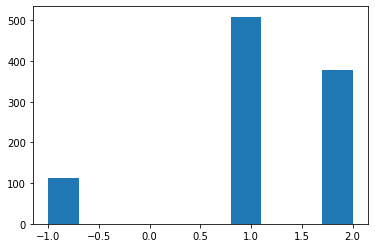

In [ ]:
import matplotlib.pyplot as plt
random.seed(1)
print(play_game(1000).count(-1))
plt.hist(play_game(1000))

#### Exercise 11

In the previous exercise, we see that when guessing at random, it's better to go first, as expected. Let's see if Player 1 can improve their strategy. 

#### Instructions 
- Create a function `play_strategic_game()`, where Player 1 always starts with the middle square, and otherwise both players place their markers randomly.
- Call `play_strategic_game` 1000 times.

In [8]:
#random.seed(1)

# write your code here
def play_strategic_game(times):
  results_game= []
  for time in range(times):
    board=create_board()
    place(board,1,(1,1))
    for i in range(4):
      random_place(board,1)
      try: 
        random_place(board,2)
      except:
        pass
    matchs=evaluate(board)
    results_game.append(matchs)
  return results_game

627


(array([18.,  0.,  0.,  0.,  0.,  0., 58.,  0.,  0., 24.]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <a list of 10 Patch objects>)

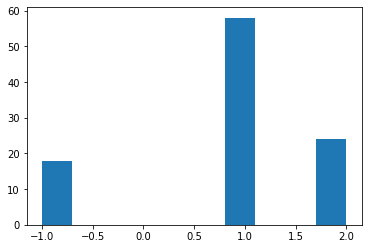

In [ ]:
random.seed(1)
print(play_strategic_game(1000).count(1))
plt.hist(play_strategic_game(100))

In [13]:
          random.seed(1)

def play_game():
  board = create_board()
  winner = 0
  while winner == 0:
    for player in [1, 2]:
      random_place(board, player)
      winner = evaluate(board)
      if winner != 0:
        break
  return winner

results = [play_game() for i in range(1000)]
results.count(1)

def play_game(times):
  results= []
  for time in range(times):
    board=create_board()
    for i in range(5):
      random_place(board,1)
      try: 
        random_place(board,2)
      except:
        pass
    matchs=evaluate(board)
    results.append(matchs)
  return results

591

In [16]:
          random.seed(1)

def play_strategic_game():
  board, winner = create_board(), 0
  board[1,1] = 1
  while winner == 0:
    for player in [2,1]:
      random_place(board, player)
      winner = evaluate(board)
      if winner != 0:
        break
  return winner

results = [play_strategic_game() for i in range(1000)]
results.count(1)
716

716